# Main
The goal of experiment 0 is to validate the approach of simulating batch effects data and using the SVCCA similarity metric to determine the affect each batch effect has on the representation of the data.

Experiment 0.2 uses a subset of the full 5K dimensional dataset to look for trends in the similarity versus number of batch effects. 

In [1]:
import os
import ast

In [2]:
# Load config file
config_file = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(),"../..")),
    "data",
    "metadata",
    "config_exp_0.2.txt")

d = {}
float_params = ["learning_rate", "kappa", "epsilon_std"]
str_params = ["analysis_name", "NN_architecture"]
lst_params = ["num_batches"]
with open(config_file) as f:
    for line in f:
        (name, val) = line.split()
        if name in float_params:
            d[name] = float(val)
        elif name in str_params:
            d[name] = str(val)
        elif name in lst_params:
            d[name] = ast.literal_eval(val)
        else:
            d[name] = int(val)

In [3]:
# Print params
print("Parameters:")
for name, val in d.items():
    print("{} = {}".format(name, val))

Parameters:
latent_dim = 30
num_simulated_samples = 6000
intermediate_dim = 2500
num_PCs = 100
kappa = 0.01
learning_rate = 0.001
num_dims = 1000
NN_architecture = NN_2500_30
epochs = 100
num_batches = [1, 2, 5, 10, 20, 50, 100, 500, 1000, 2000, 3000, 6000]
epsilon_std = 1.0
batch_size = 100
analysis_name = experiment_0


In [4]:
# Training

print("Training VAE using params...")
%run ./1_train_vae.ipynb

Training VAE using params...


Using TensorFlow backend.


directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/data
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/models
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/output
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/data/encoded
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/output/stats
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/output/viz
(950, 5549)
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/data/encoded/NN_2500_30
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/models/NN_2500_30
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/output/stats/NN_2500_30
directory already ex

855/855 [==============================] - 5s 6ms/step - loss: 3324.5384 - val_loss: 3318.2307
Epoch 67/100
855/855 [==============================] - 5s 6ms/step - loss: 3325.4764 - val_loss: 3315.2583
Epoch 68/100
855/855 [==============================] - 5s 6ms/step - loss: 3323.2634 - val_loss: 3316.4932
Epoch 69/100
855/855 [==============================] - 5s 6ms/step - loss: 3321.6376 - val_loss: 3316.7112
Epoch 70/100
855/855 [==============================] - 5s 6ms/step - loss: 3322.4927 - val_loss: 3316.6938
Epoch 71/100
855/855 [==============================] - 5s 6ms/step - loss: 3320.9720 - val_loss: 3318.5056
Epoch 72/100
855/855 [==============================] - 5s 6ms/step - loss: 3321.2227 - val_loss: 3314.7500
Epoch 73/100
855/855 [==============================] - 5s 6ms/step - loss: 3317.7966 - val_loss: 3313.7090
Epoch 74/100
855/855 [==============================] - 5s 6ms/step - loss: 3317.4775 - val_loss: 3315.4575
Epoch 75/100
855/855 [===================

Simulating data...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/data/simulated/experiment_0
(950, 5549)


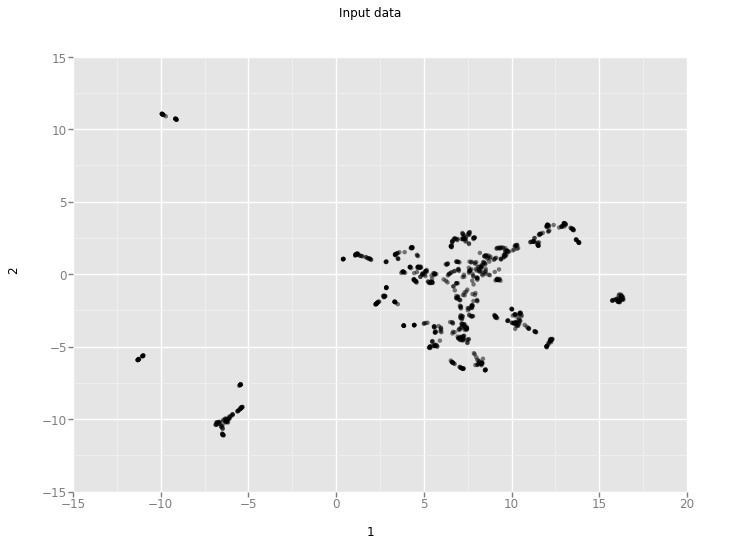

<ggplot: (-9223363250055067795)>


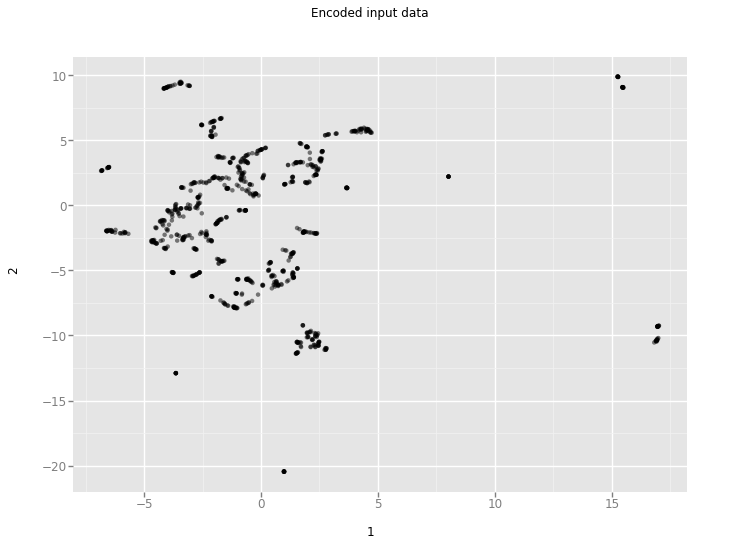

<ggplot: (-9223363250057430030)>


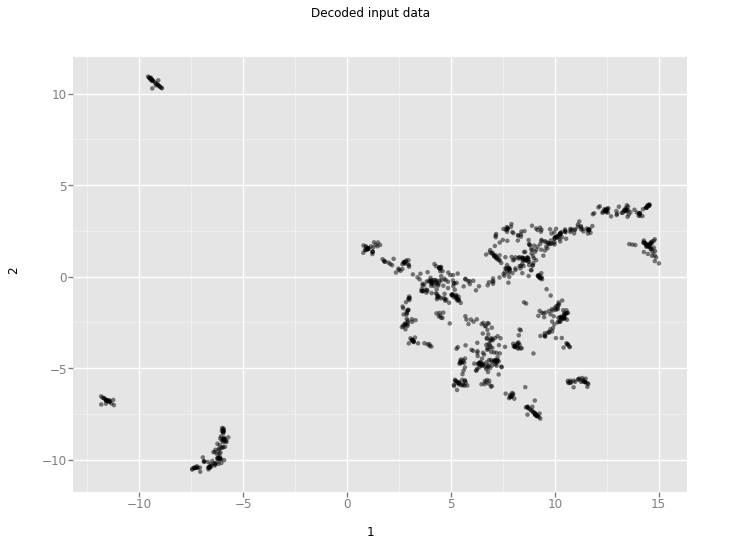

<ggplot: (-9223363250057385626)>


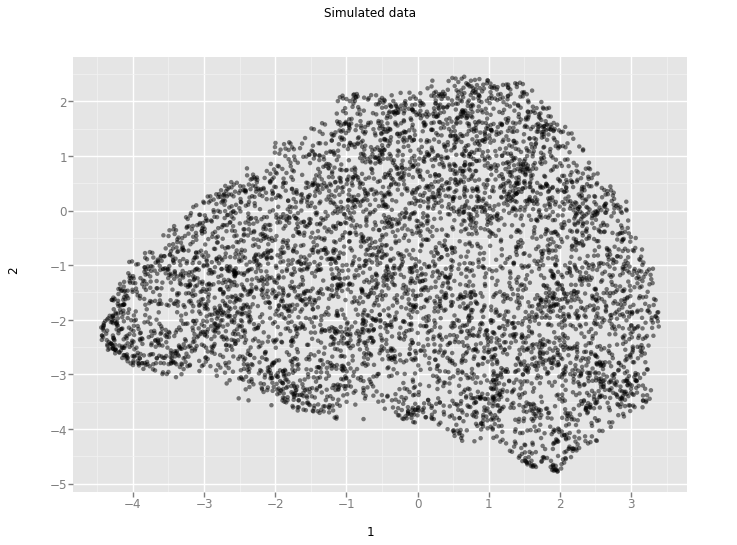

<ggplot: (-9223363250057502818)>


In [5]:
# Simulate data

print("Simulating data...")
%run ./2_simulate_data_truncated.ipynb

In [6]:
# Add batch effects to simulated data

print("Adding batch effects to simulated data...")
%run ./3_add_batch_effects.ipynb

Adding batch effects to simulated data...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
directory already exists: /home/alexandra/Documents/Playground/Batch_effects_simulation_local/data/batch_simulated/experiment_0
Creating simulated data with 1 batches..
Creating simulated data with 2 batches..
Creating simulated data with 5 batches..
Creating simulated data with 10 batches..
Creating simulated data with 20 batches..
Creating simulated data with 50 batches..
Creating simulated data with 100 batches..
Creating simulated data with 500 batches..
Creating simulated data with 1000 batches..
Creating simulated data with 2000 batches..
Creating simulated data with 3000 batches..
Creating simulated data with 6000 batches..


In [7]:
# Calculate similarity between data with different batch effects

print("Calculating similarity between representations...")
%run ./4_similarity_analysis.ipynb

Calculating similarity between representations...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Calculating SVCCA score for 1 batch vs 1 batches..


LZMAError: Input format not supported by decoder

CPU times: user 3.75 s, sys: 23.1 ms, total: 3.78 s
Wall time: 3.78 s


NameError: name 'shuffled_simulated_data' is not defined

NameError: name 'svcca_raw_df' is not defined